Libraries we need


In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import accuracy_score
# from sklearn.metrics import plot_confusion_matrix
from sklearn.tree import plot_tree

from mlxtend.evaluate import bias_variance_decomp
from sklearn.preprocessing import LabelEncoder

Import dataset and check the "NaN" or "Null"


### Q2.2.1 Data Preprocessing

In [2]:
# import Penguins dataset
penguins = sns.load_dataset('penguins')
original_size = penguins.shape[0]
print(penguins.columns.to_list())
print()
# Check 'NaN' or 'Null' Data
print('----Original-----')
print(penguins.isnull().sum())

# Delete null values
penguins.dropna(inplace=True)
print()
print('----New-----')
print()
print(penguins.isnull().sum())
after_size = penguins.shape[0]


['species', 'island', 'bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g', 'sex']

----Original-----
species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64

----New-----

species              0
island               0
bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64


In [3]:
penguins.info()

<class 'pandas.core.frame.DataFrame'>
Index: 333 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            333 non-null    object 
 1   island             333 non-null    object 
 2   bill_length_mm     333 non-null    float64
 3   bill_depth_mm      333 non-null    float64
 4   flipper_length_mm  333 non-null    float64
 5   body_mass_g        333 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 20.8+ KB


In [4]:

# Convert features: string to numeric

df = penguins.copy()
df = pd.get_dummies(df, columns=['island']) # one-hot encoding of categorical columns 
df = pd.get_dummies(df, columns=['sex'])
X = df.drop('species', axis=1).astype(float)
print(X)
y = df['species']
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42)



     bill_length_mm  bill_depth_mm  flipper_length_mm  body_mass_g  \
0              39.1           18.7              181.0       3750.0   
1              39.5           17.4              186.0       3800.0   
2              40.3           18.0              195.0       3250.0   
4              36.7           19.3              193.0       3450.0   
5              39.3           20.6              190.0       3650.0   
..              ...            ...                ...          ...   
338            47.2           13.7              214.0       4925.0   
340            46.8           14.3              215.0       4850.0   
341            50.4           15.7              222.0       5750.0   
342            45.2           14.8              212.0       5200.0   
343            49.9           16.1              213.0       5400.0   

     island_Biscoe  island_Dream  island_Torgersen  sex_Female  sex_Male  
0              0.0           0.0               1.0         0.0       1.0  
1        

In [16]:
print('Q2.2.1 Data Preprocessing')
print(f"Number of data points in the whole dataset originally: {original_size}")
print(f"Number of data points in the whole dataset originally: {after_size}")
print(f"Number of data points in the training set after splitting: {X_train.shape[0]}")
print(f"Number of data points in the test set after splitting: {X_test.shape[0]}")

Q2.2.1 Data Preprocessing
Number of data points in the whole dataset originally: 344
Number of data points in the whole dataset originally: 333
Number of data points in the training set after splitting: 233
Number of data points in the test set after splitting: 100


### Q2.1.2 Data Statistics

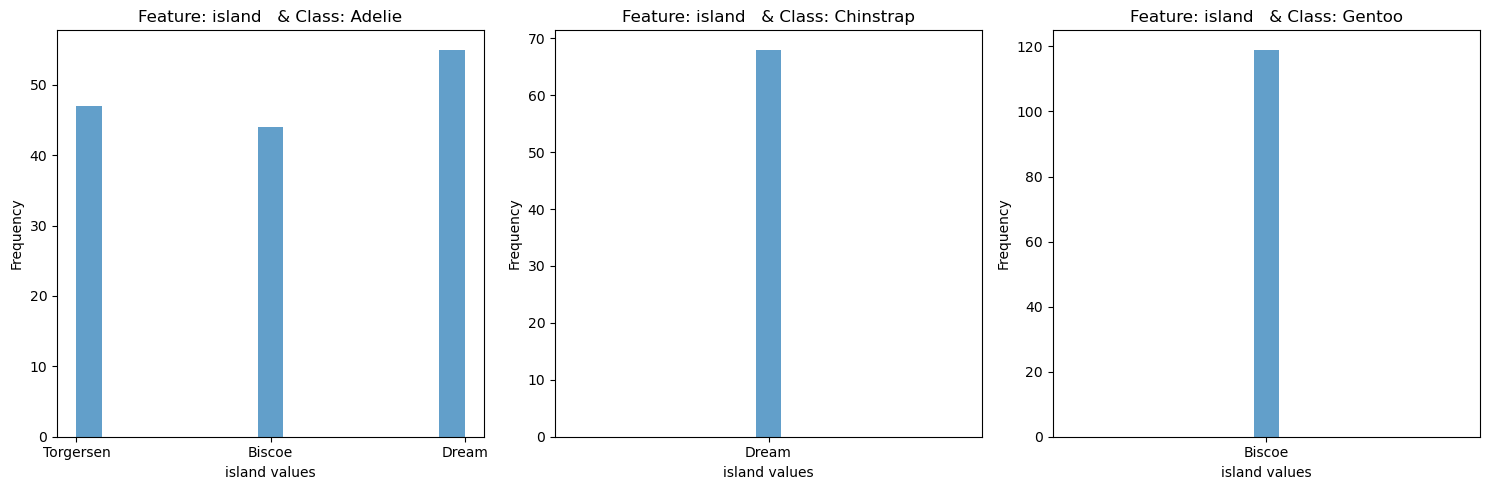

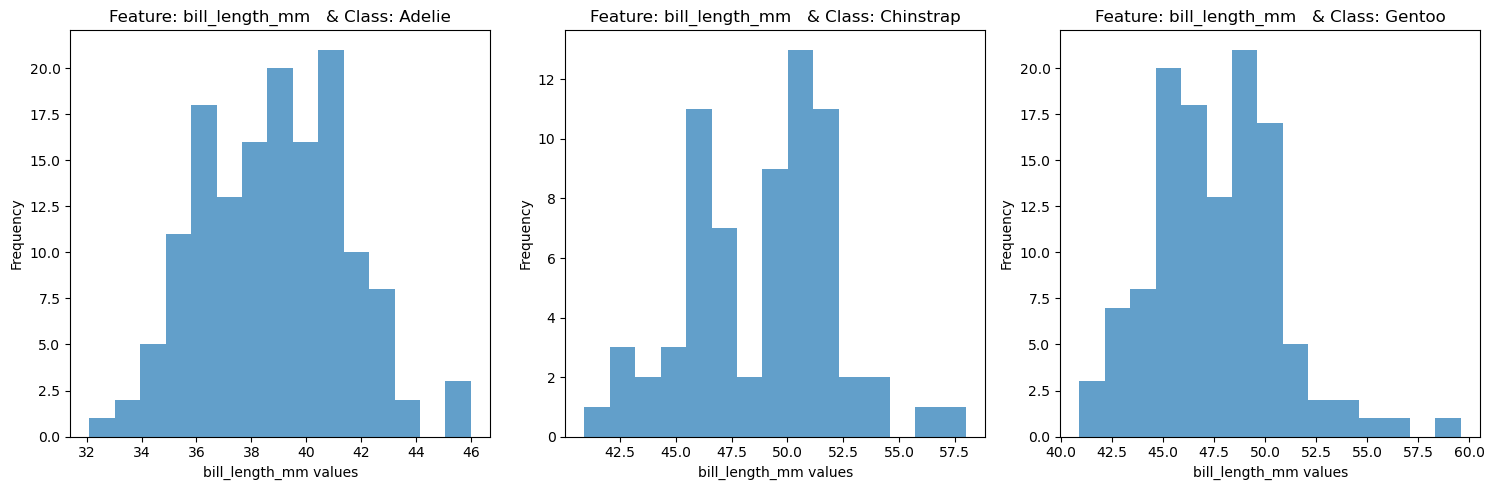

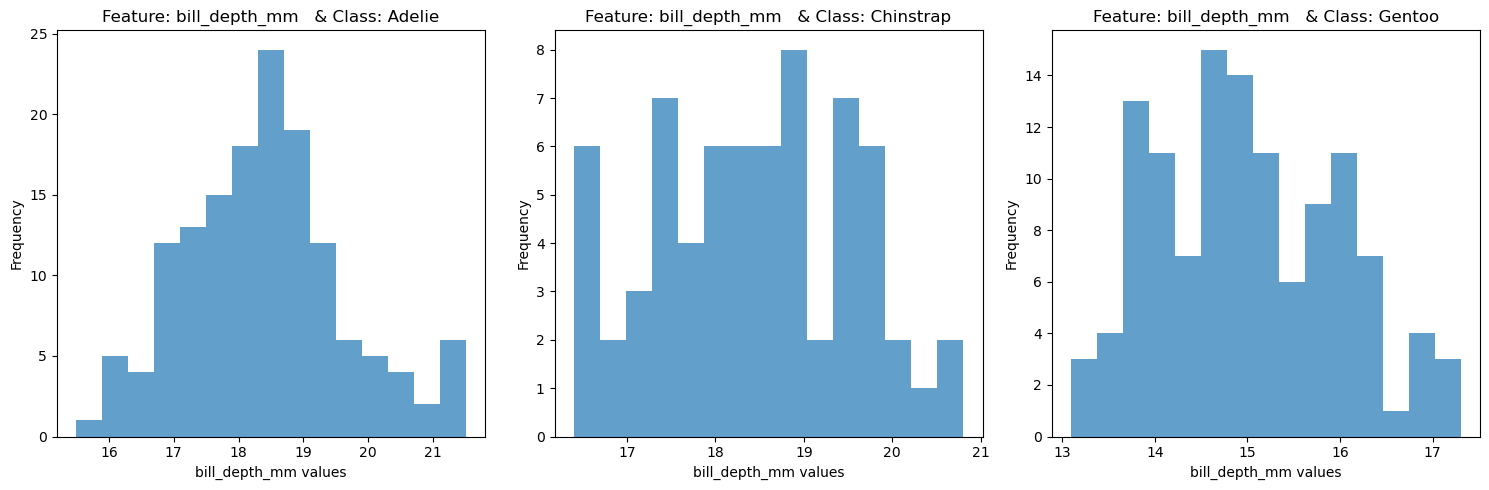

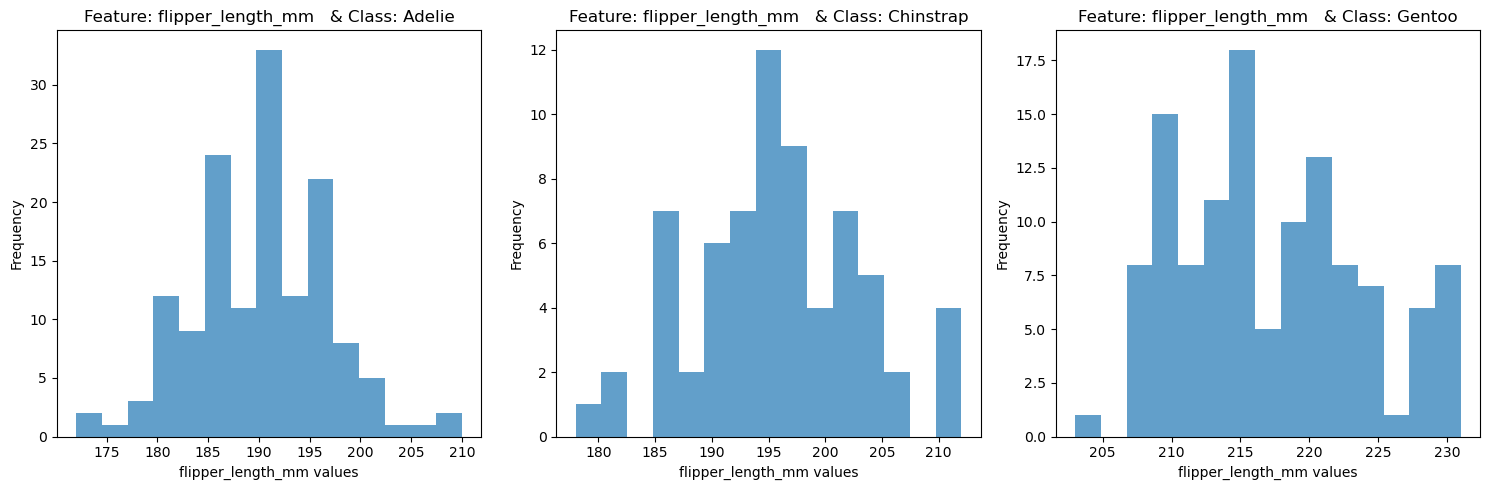

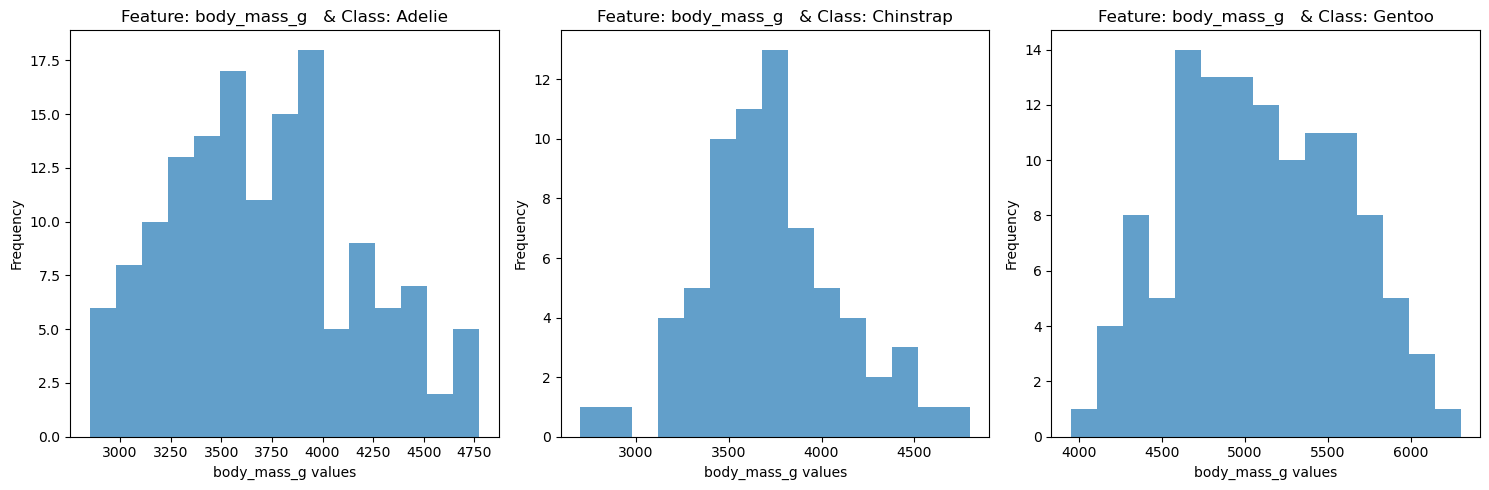

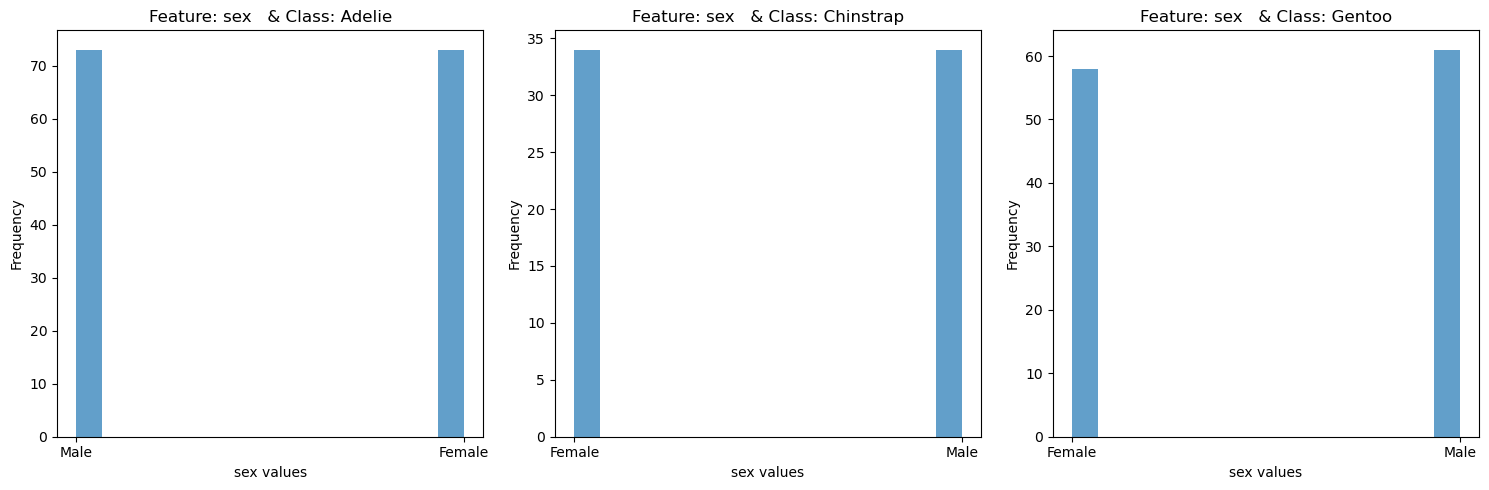

In [6]:
features = ['island', 'bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g', 'sex']
species = penguins['species'].unique()

# Create histograms
for feature in features:
    plt.figure(figsize=(15, 5))
    subplot_index = 1  # Iterating 1,2,3 ... to tight layout
    
    for spec in species:
        plt.subplot(1, 3, subplot_index)
        subset = penguins[penguins['species'] == spec]
        plt.hist(subset[feature], bins=15, alpha=0.7)
        plt.title(f'Feature: {feature}   & Class: {spec}')
        plt.xlabel(f'{feature} values')
        plt.ylabel('Frequency')
        subplot_index += 1  # Increment subplot index for next species
    plt.tight_layout()
    plt.show()


### Q2.1.3 Decision Tree


Q2.1.3 Decision Tree:
1. Results with maximum depth as 3 and least node size as 5: 
training accuracy: 0.9571,  test accuracy: 0.9800


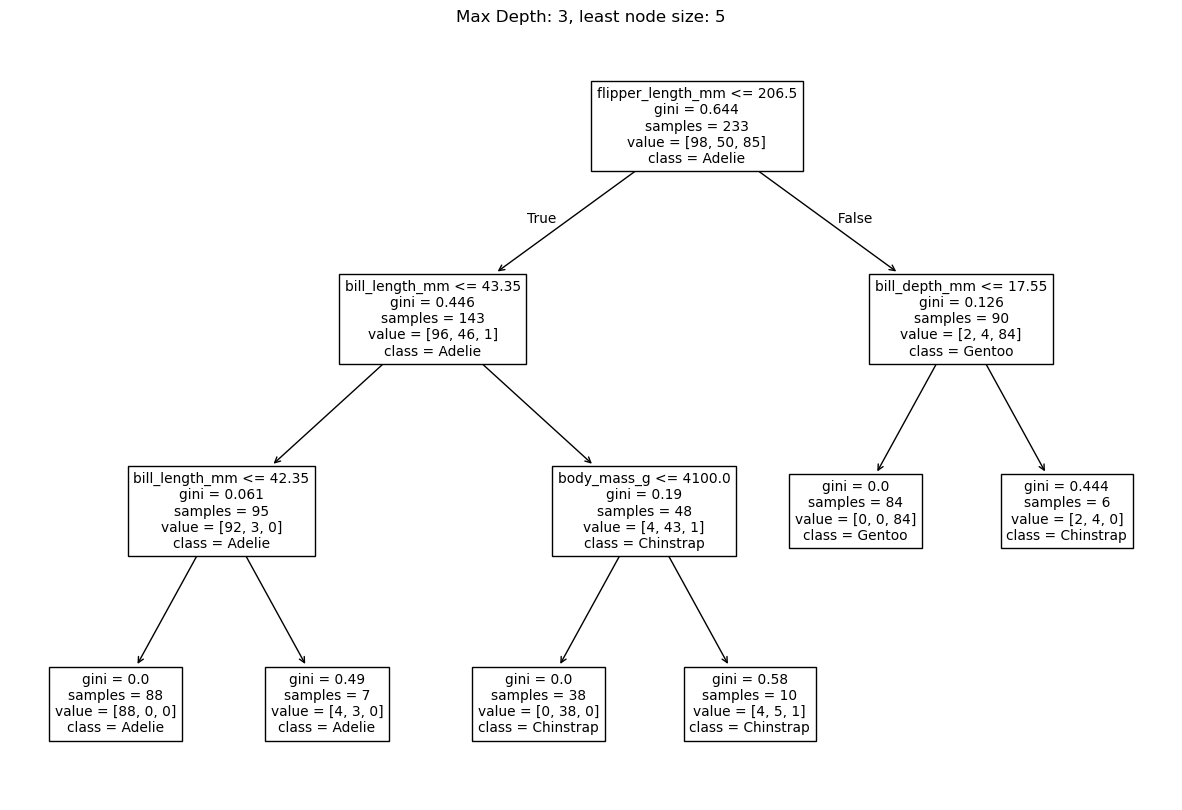

2. Results with maximum depth as 3 and least node size as 7: 
training accuracy: 0.9528,  test accuracy: 0.9600


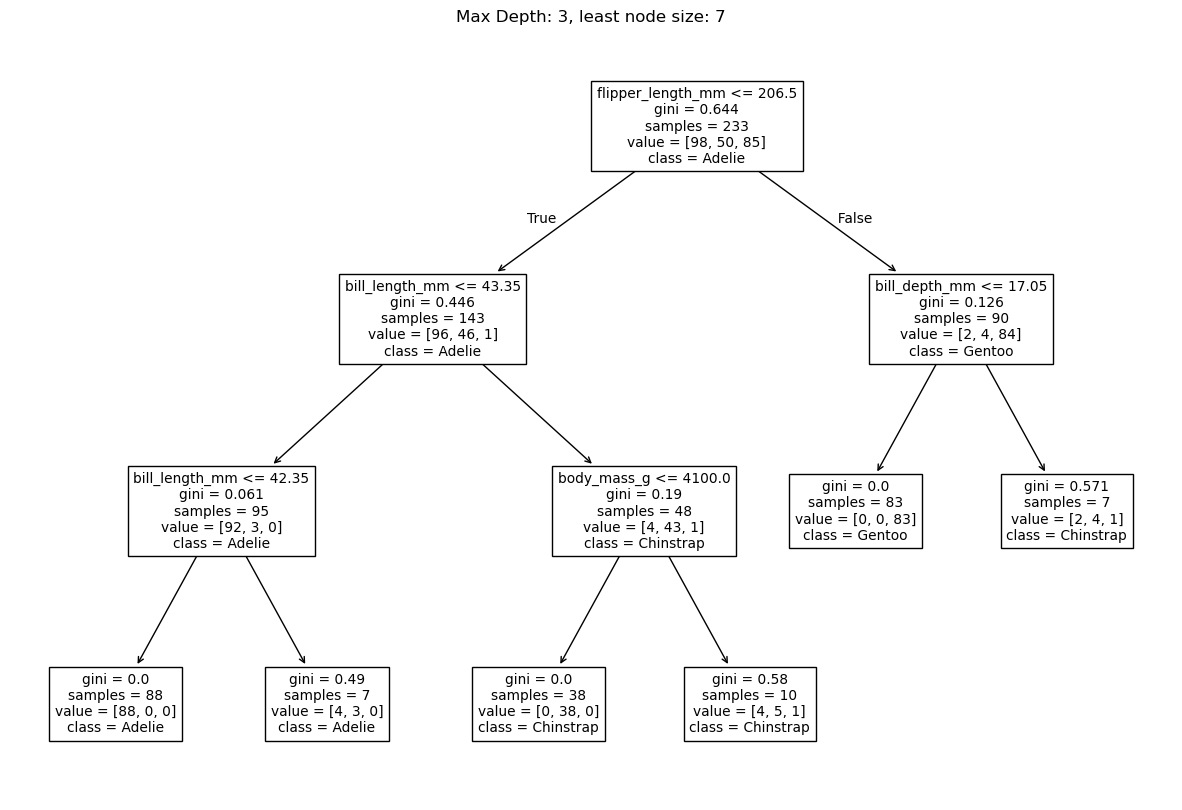

3. Results with maximum depth as 3 and least node size as 9: 
training accuracy: 0.9442,  test accuracy: 0.9200


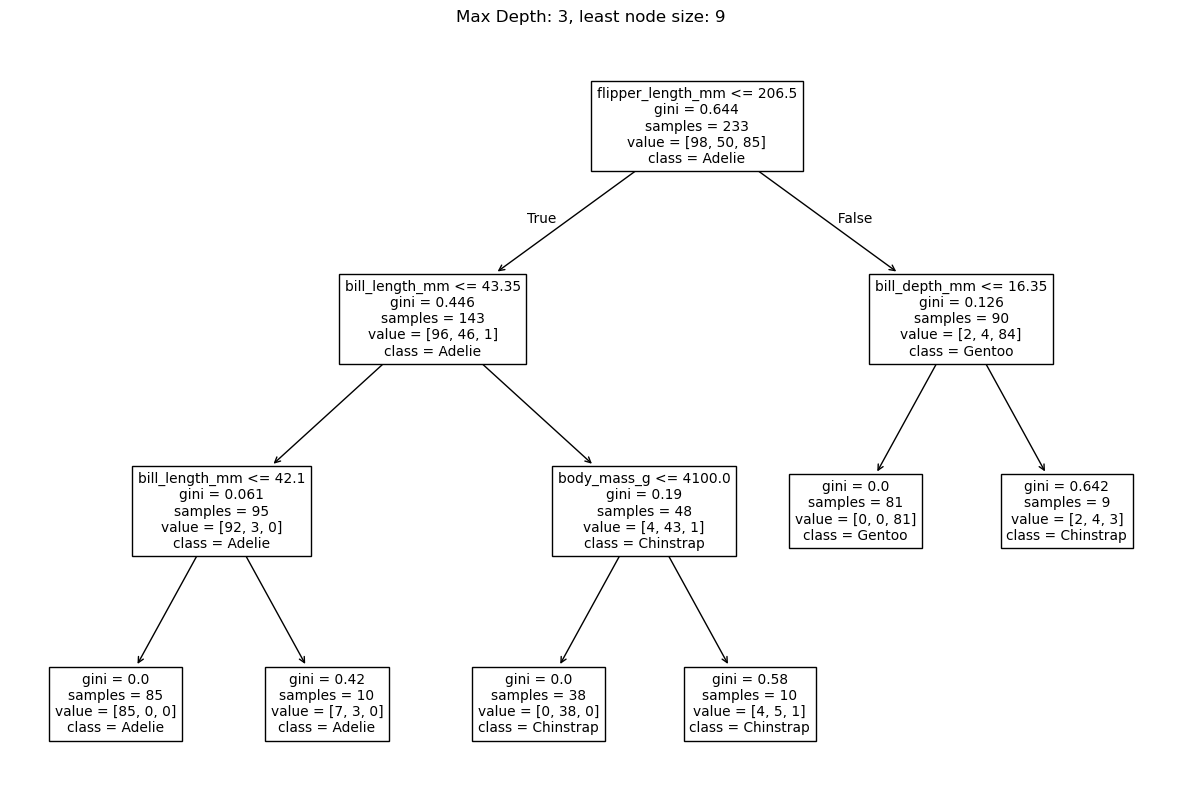

4. Results with maximum depth as 4 and least node size as 5: 
training accuracy: 0.9700,  test accuracy: 0.9800


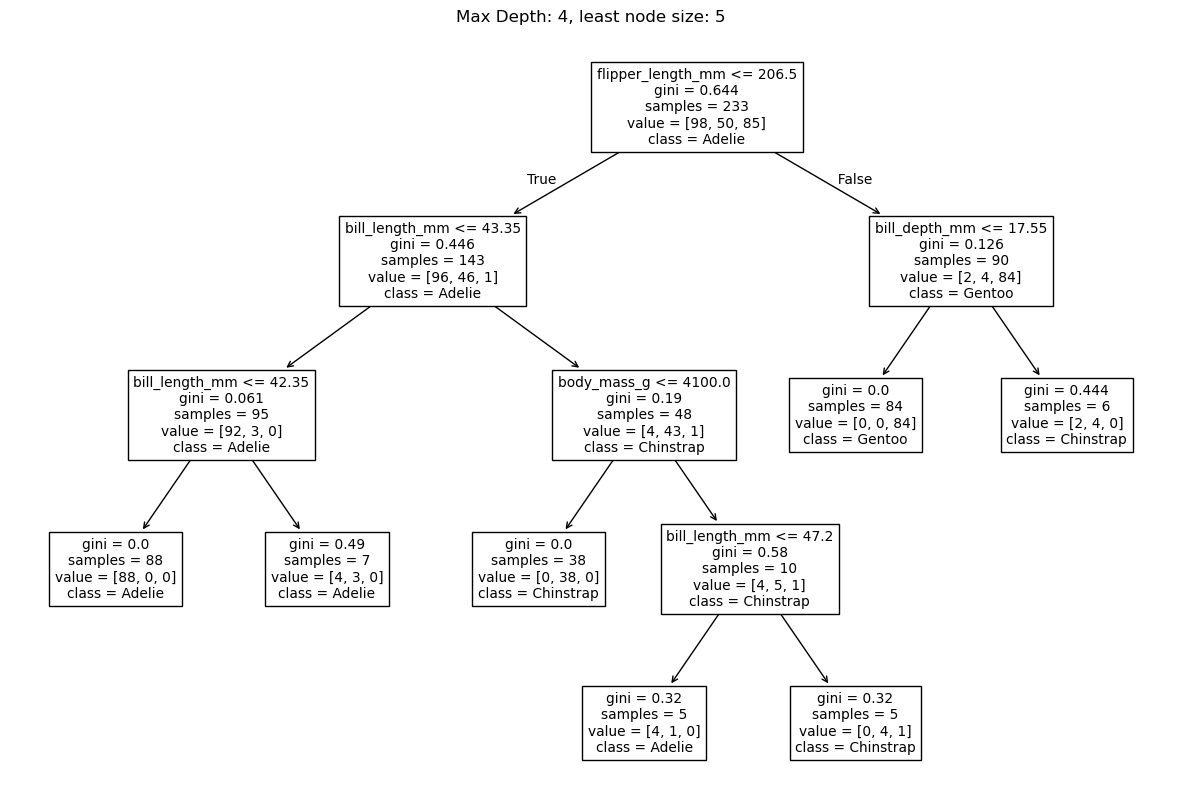

5. Results with maximum depth as 4 and least node size as 7: 
training accuracy: 0.9528,  test accuracy: 0.9600


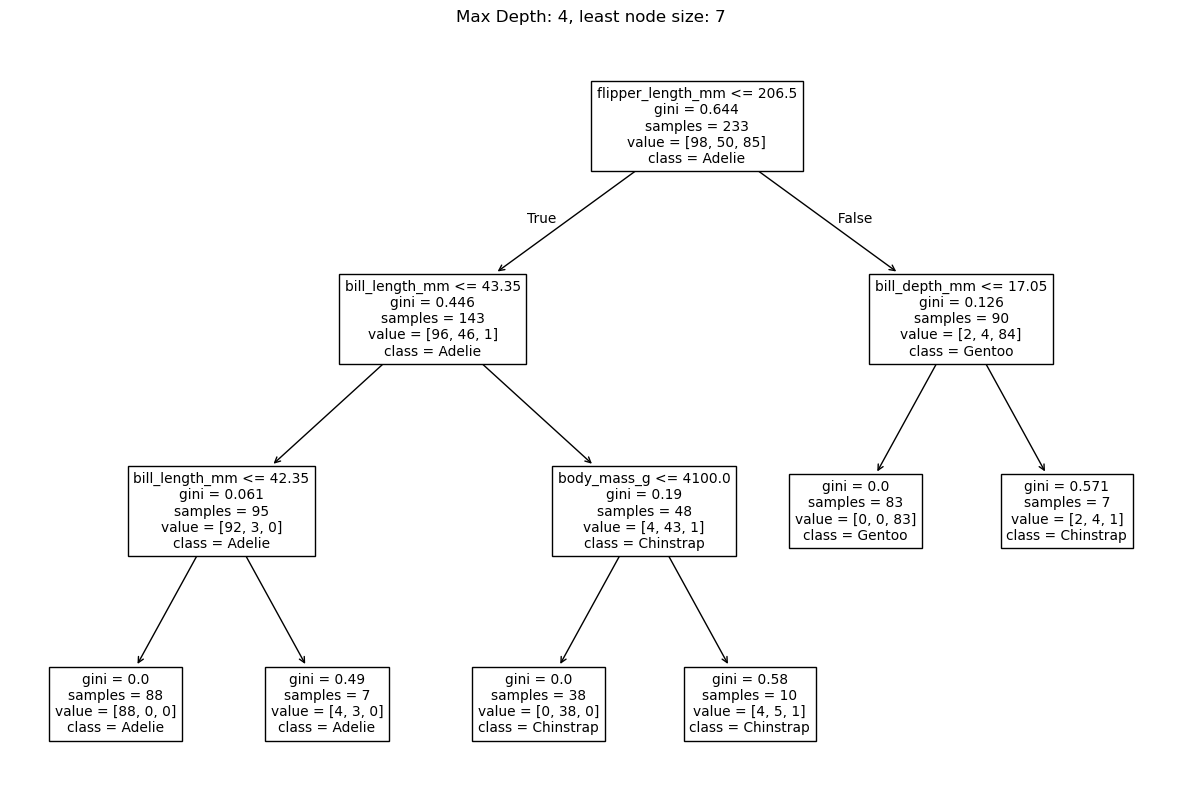

6. Results with maximum depth as 4 and least node size as 9: 
training accuracy: 0.9442,  test accuracy: 0.9200


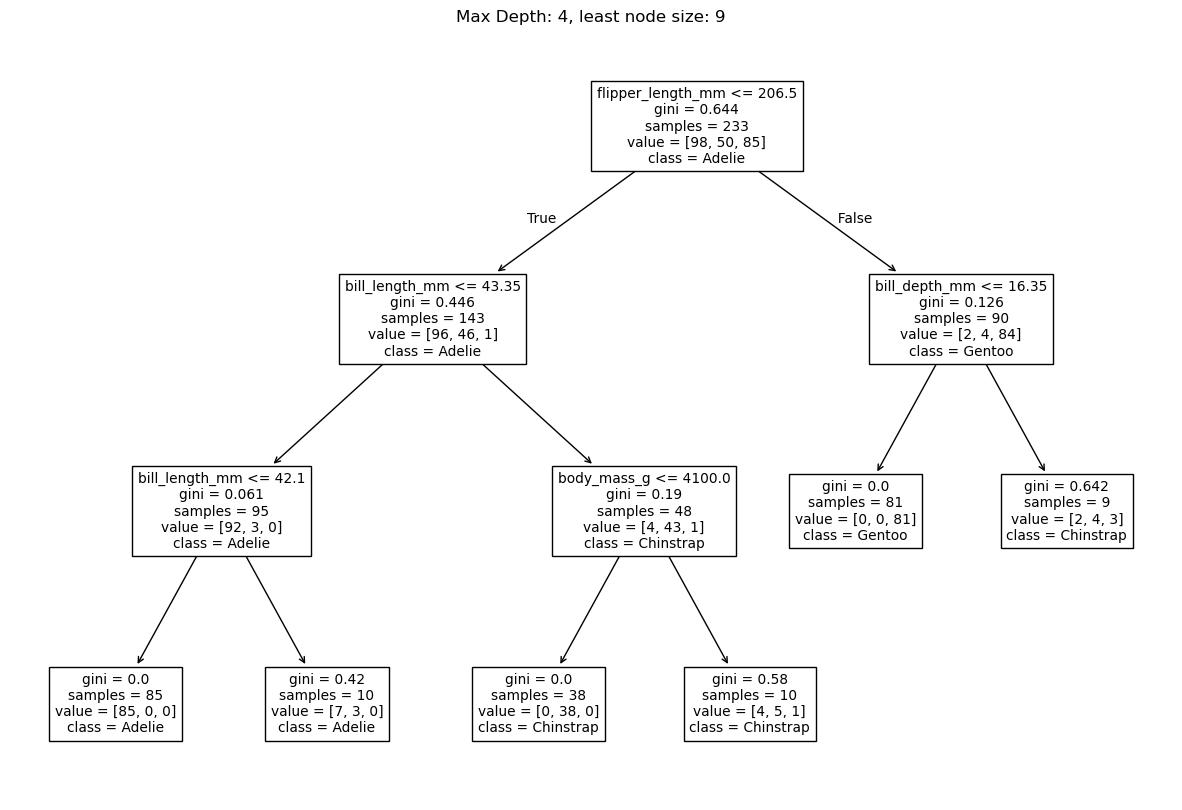

7. Results with maximum depth as 5 and least node size as 5: 
training accuracy: 0.9700,  test accuracy: 0.9800


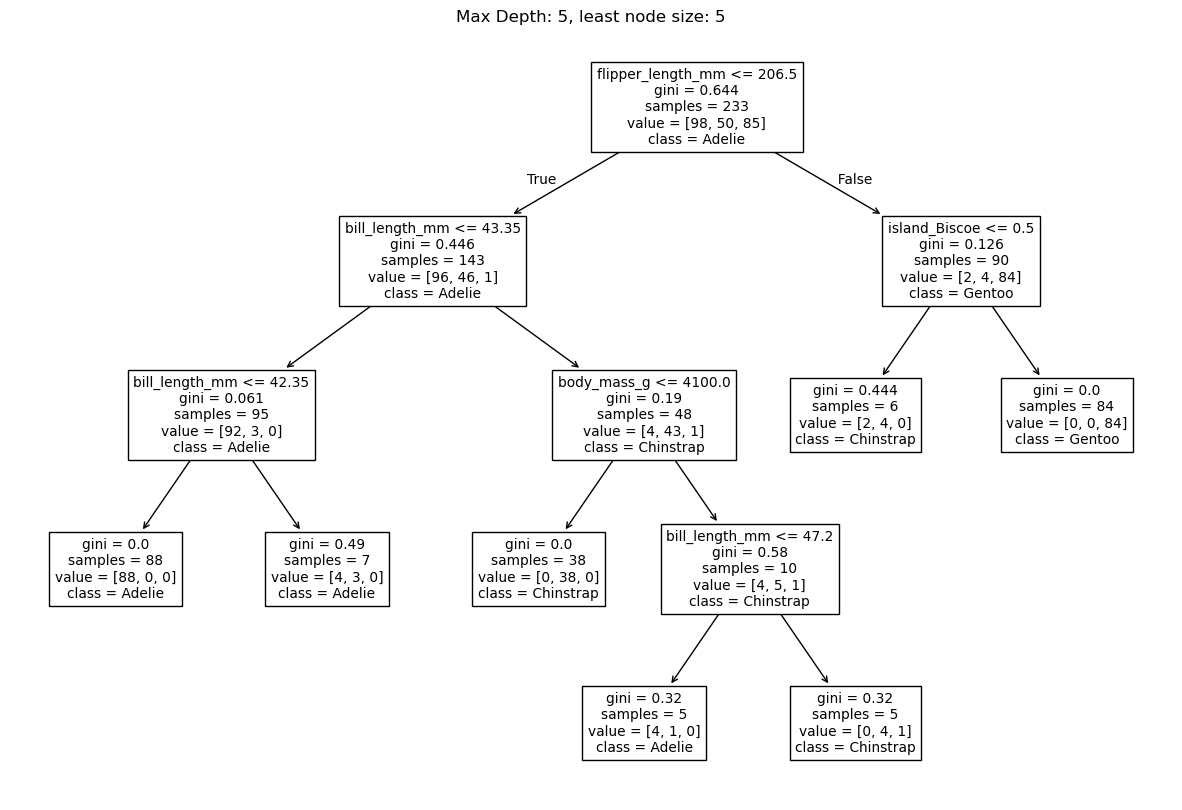

8. Results with maximum depth as 5 and least node size as 7: 
training accuracy: 0.9528,  test accuracy: 0.9600


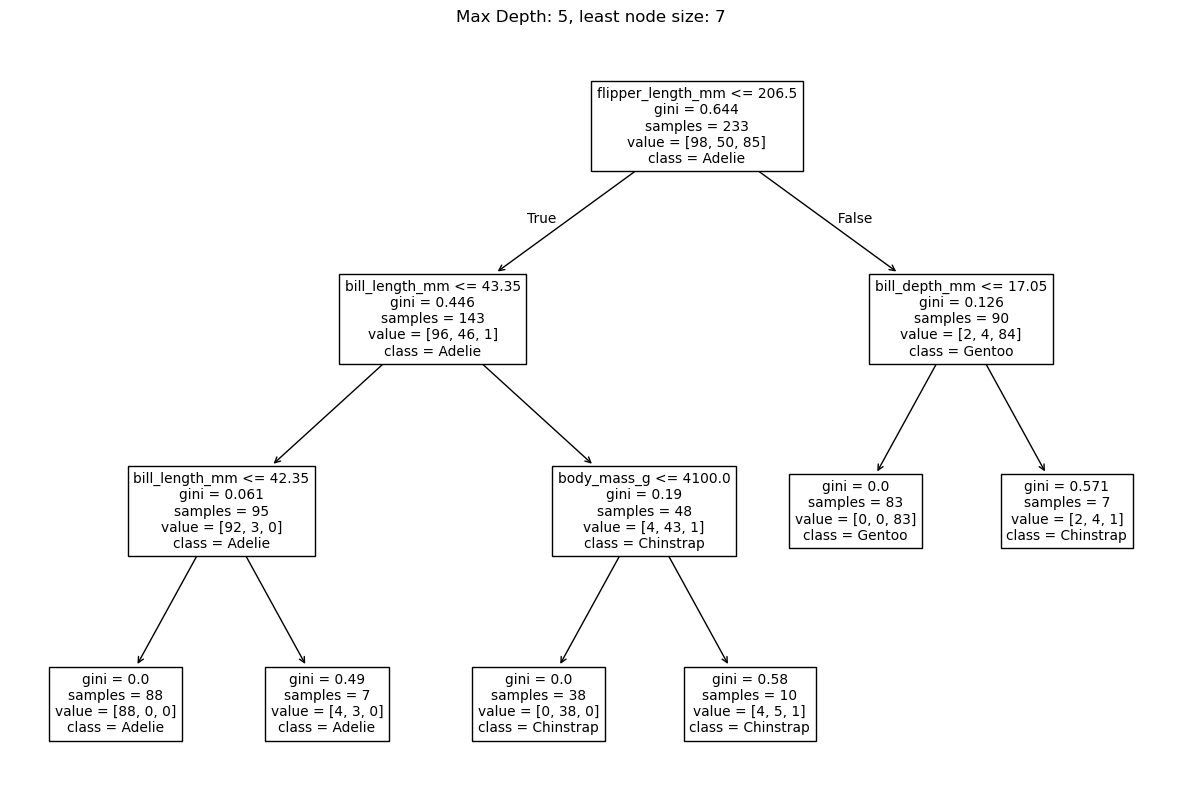

9. Results with maximum depth as 5 and least node size as 9: 
training accuracy: 0.9442,  test accuracy: 0.9200


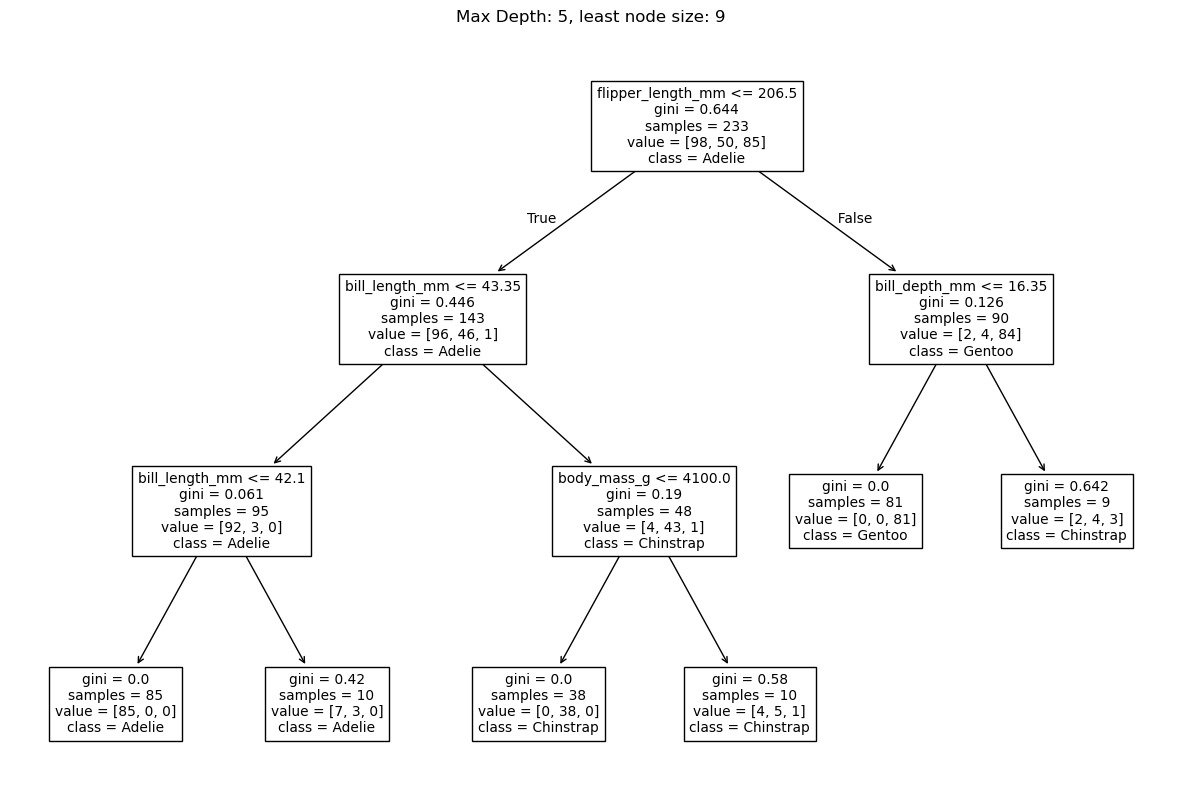

In [7]:
print('Q2.1.3 Decision Tree:')
max_depths = [3, 4, 5]
min_samples_leafs = [5, 7, 9]
i = 1

for max_depth in max_depths:
    for min_samples_leaf in min_samples_leafs:
        dtc = DecisionTreeClassifier(
            max_depth=max_depth, min_samples_leaf=min_samples_leaf)
        dtc.fit(X_train, y_train)

        y_train_pred = dtc.predict(X_train)
        y_test_pred = dtc.predict(X_test)

        #acc = accuracy_score(y_test, y_pred)

        train_correct_predictions = sum(y_train == y_train_pred)  
        test_correct_predictions = sum(y_test == y_test_pred)

        # Mannual calculations using given formalula : correct prediction/ number of data
        train_acc = train_correct_predictions / len(y_train)
        test_acc = test_correct_predictions / len(y_test)

        print(
            f'{i}. Results with maximum depth as {max_depth} and least node size as {min_samples_leaf}: \ntraining accuracy: {train_acc:.4f},  test accuracy: {test_acc:.4f}')

        # plot_confusion_matrix(dtc, X_test, y_test, display_labels=['Adelie', 'Chinstrap', 'Gentoo'])
        # plt.title(f'Max Depth: {max_depth}, Min Samples Leaf: {min_samples_leaf}')
        # plt.show()

        fig, ax = plt.subplots(figsize=(15, 10))
        plot_tree(dtc, feature_names=X.columns, class_names=[
                  'Adelie', 'Chinstrap', 'Gentoo'], filled=False, ax=ax)
        plt.title(
            f'Max Depth: {max_depth}, least node size: {min_samples_leaf}')
        plt.show()
        i +=1

### Q2.1.4 Bagging of trees


In [8]:
print('Q2.1.4 Bagging of Trees:')
depths = [3, 4, 5]
num_trees = [50, 100, 150 ]
i = 1

for d in depths:
    for n in num_trees:
        base_clf = DecisionTreeClassifier(max_depth=d)
        bagging_clf = BaggingClassifier(
            estimator=base_clf, n_estimators=n)  # Updated argument
        bagging_clf.fit(X_train, y_train)
        
        #train_acc = bagging_clf.score(X_train, y_train)
        #test_acc = bagging_clf.score(X_test, y_test)
        y_train_pred = bagging_clf.predict(X_train)
        y_test_pred = bagging_clf.predict(X_test)
        train_accuracy = sum(y_train == y_train_pred) / len(y_train)
        test_accuracy = sum(y_test == y_test_pred) / len(y_test)

        print(f'{i}. Results with maximum depth as {max_depth} and number of trees as {num_trees}:')
        print(f'training accuracy: {train_accuracy:.4f}, test accuracy: {test_accuracy:.4f}\n')

        i+=1

Q2.1.4 Bagging of Trees:
1. Results with maximum depth as 5 and number of trees as [50, 100, 150]:
training accuracy: 0.9871, test accuracy: 0.9800

2. Results with maximum depth as 5 and number of trees as [50, 100, 150]:
training accuracy: 0.9957, test accuracy: 0.9800

3. Results with maximum depth as 5 and number of trees as [50, 100, 150]:
training accuracy: 0.9957, test accuracy: 0.9800

4. Results with maximum depth as 5 and number of trees as [50, 100, 150]:
training accuracy: 1.0000, test accuracy: 0.9900

5. Results with maximum depth as 5 and number of trees as [50, 100, 150]:
training accuracy: 1.0000, test accuracy: 0.9900

6. Results with maximum depth as 5 and number of trees as [50, 100, 150]:
training accuracy: 0.9957, test accuracy: 0.9800

7. Results with maximum depth as 5 and number of trees as [50, 100, 150]:
training accuracy: 1.0000, test accuracy: 0.9900

8. Results with maximum depth as 5 and number of trees as [50, 100, 150]:
training accuracy: 1.0000, test a

### Q2.1.5 Random forests


In [ ]:
print('Q2.1.5 Random Forests:')
num_trees = [50, 100, 150]
max_features = [2, 3, 4]
i = 1
for n in num_trees:
    for m in max_features:
        clf = RandomForestClassifier(n_estimators=n, max_features=m)

        clf.fit(X_train, y_train)

        y_train_pred = clf.predict(X_train)
        y_test_pred = clf.predict(X_test)
        train_accuracy = sum(y_train == y_train_pred) / len(y_train)
        test_accuracy = sum(y_test == y_test_pred) / len(y_test)

        print(f'{i}. Results with maximum depth as {max_depth} and number of trees as {num_trees}:')
        print(f'training accuracy: {train_accuracy:.4f}, test accuracy: {test_accuracy:.4f}\n')
        i+=1

Q2.1.5 Random Forests:
1. Results with maximum depth as 5 and number of trees as [50, 100, 150]:
training accuracy: 1.0000, test accuracy: 0.9900

2. Results with maximum depth as 5 and number of trees as [50, 100, 150]:
training accuracy: 1.0000, test accuracy: 0.9800

3. Results with maximum depth as 5 and number of trees as [50, 100, 150]:
training accuracy: 1.0000, test accuracy: 0.9900

4. Results with maximum depth as 5 and number of trees as [50, 100, 150]:
training accuracy: 1.0000, test accuracy: 0.9900

5. Results with maximum depth as 5 and number of trees as [50, 100, 150]:
training accuracy: 1.0000, test accuracy: 0.9900

6. Results with maximum depth as 5 and number of trees as [50, 100, 150]:
training accuracy: 1.0000, test accuracy: 0.9800

7. Results with maximum depth as 5 and number of trees as [50, 100, 150]:
training accuracy: 1.0000, test accuracy: 0.9900

8. Results with maximum depth as 5 and number of trees as [50, 100, 150]:
training accuracy: 1.0000, test acc

### Q2.1.6 Bias & Variances Tradeoff

#### # of trees in range(10,101,10) - Small nums of trees

In [10]:
X = df.drop('species', axis=1)  # Features
df['species'] = LabelEncoder().fit_transform(df['species'])  # Encode target labels
y = df['species']  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

num_trees = range(10, 101, 10)

# Storage base
bias_squared = []
variance = []

for n in num_trees:
    print(f"Random Forest with {n} trees:")
    clf = RandomForestClassifier(n_estimators=n, random_state=42)
    
    # Get the bias-variance decomposition
    mse, bias, var = bias_variance_decomp(
        clf, X_train.values, y_train.values, X_test.values, y_test.values, loss='mse', num_rounds=200, random_seed=42)
    
    # Append bias^2 and variance to the respective lists
    bias_squared.append(bias ** 2)
    variance.append(var)
    
    print(f"Bias^2: {bias**2:.6f}    Variance: {var:.6f}\n")


Random Forest with 10 trees:
Bias^2: 0.000205    Variance: 0.021618

Random Forest with 20 trees:
Bias^2: 0.000173    Variance: 0.019084

Random Forest with 30 trees:
Bias^2: 0.000139    Variance: 0.006669

Random Forest with 40 trees:
Bias^2: 0.000140    Variance: 0.006564

Random Forest with 50 trees:
Bias^2: 0.000137    Variance: 0.005785

Random Forest with 60 trees:
Bias^2: 0.000130    Variance: 0.005606

Random Forest with 70 trees:
Bias^2: 0.000127    Variance: 0.006446

Random Forest with 80 trees:
Bias^2: 0.000124    Variance: 0.006300

Random Forest with 90 trees:
Bias^2: 0.000123    Variance: 0.004525

Random Forest with 100 trees:
Bias^2: 0.000125    Variance: 0.004566



Q2.1.6 Relationship of Bias/Variance with respect to Number of Trees in Random Forests:
Bias^2 - Trees:


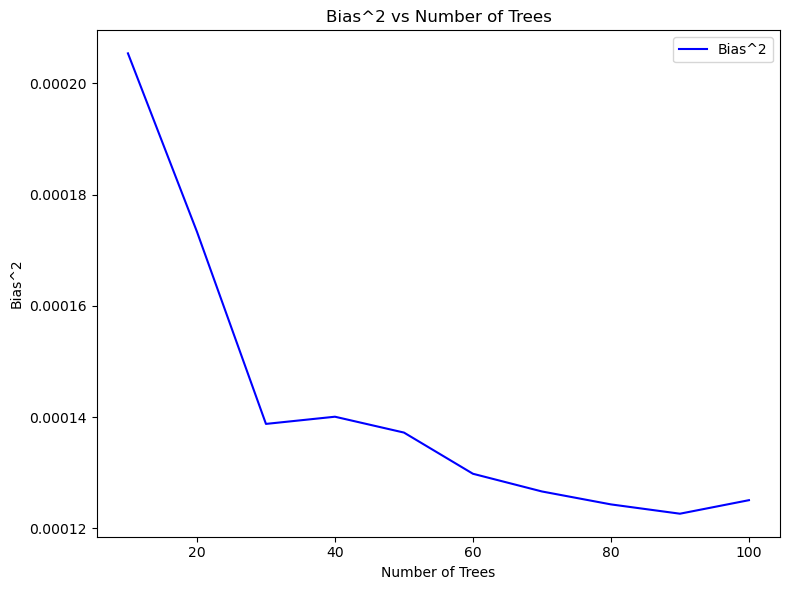

When the number of trees are relatively small, as the number of trees increases,
the model predictions become more accurate, reducing bias.

variance - trees


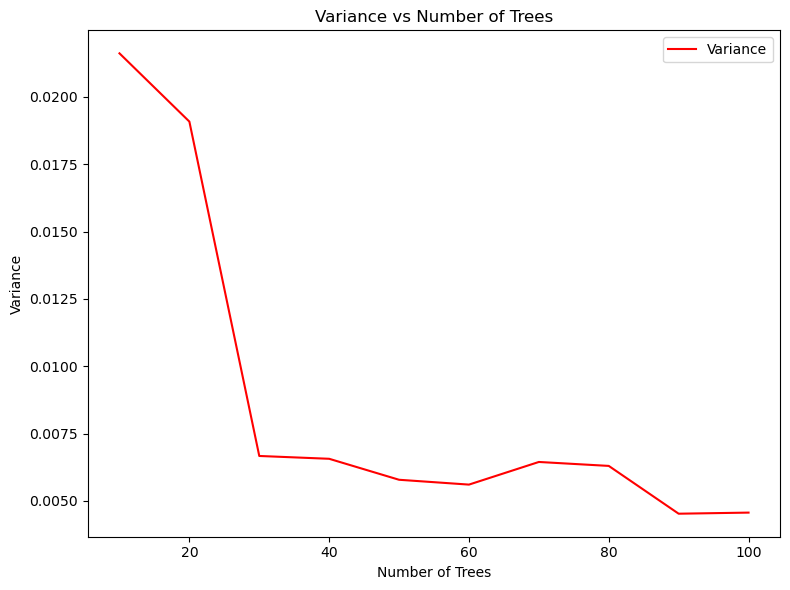

When the number of trees are relatively small, as the number of trees increases,
variance typically decreases. This is because the Random Forest model becomes more stable,
averaging the predictions of multiple trees, which reduces the overall variance of the predictions.


In [ ]:
print('Q2.1.6 Relationship of Bias/Variance with respect to Number of Trees in Random Forests:')
# 1. Bias^2 vs # of Trees
print("Bias^2 - Trees:")
plt.figure(figsize=(8, 6))
plt.plot(num_trees, bias_squared, label="Bias^2", color='blue')
plt.xlabel("Number of Trees")
plt.ylabel("Bias^2")
plt.title("Bias^2 vs Number of Trees")
plt.legend()
plt.tight_layout()
plt.show()
print('When the number of trees are relatively small, as the number of trees increases,\nthe model predictions become more accurate, reducing bias.\n')

# 2. Variance vs # of Trees 
print("variance - trees")
plt.figure(figsize=(8, 6))
plt.plot(num_trees, variance, label="Variance", color='red')
plt.xlabel("Number of Trees")
plt.ylabel("Variance")
plt.title("Variance vs Number of Trees")
plt.legend()
plt.tight_layout()
plt.show()
print("When the number of trees are relatively small, as the number of trees increases,\nvariance typically decreases. This is because the Random Forest model becomes more stable,\naveraging the predictions of multiple trees, which reduces the overall variance of the predictions.")

#### # of trees in range(100,1001,100) (larger iterations)

In [13]:
print('When the number of trees reaching a larger scale:')
num_trees = range(100, 1001, 100)

# Storage base
bias_squared = []
variance = []

for n in num_trees:
    print(f"Random Forest with {n} trees:")
    clf = RandomForestClassifier(n_estimators=n, random_state=42)
    
    # Get the bias-variance decomposition
    mse, bias, var = bias_variance_decomp(
        clf, X_train.values, y_train.values, X_test.values, y_test.values, loss='mse', num_rounds=200, random_seed=42)
    
    # Append bias^2 and variance to the respective lists
    bias_squared.append(bias ** 2)
    variance.append(var)
    
    print(f"Bias^2: {bias**2:.6f}\n Variance: {var:.6f}\n")



When the number of trees reaching a larger scale:
Random Forest with 100 trees:
Bias^2: 0.000125
 Variance: 0.004566

Random Forest with 200 trees:
Bias^2: 0.000134
 Variance: 0.004819

Random Forest with 300 trees:
Bias^2: 0.000138
 Variance: 0.004245

Random Forest with 400 trees:
Bias^2: 0.000138
 Variance: 0.003723

Random Forest with 500 trees:
Bias^2: 0.000142
 Variance: 0.003946

Random Forest with 600 trees:
Bias^2: 0.000139
 Variance: 0.003307

Random Forest with 700 trees:
Bias^2: 0.000142
 Variance: 0.003524

Random Forest with 800 trees:
Bias^2: 0.000143
 Variance: 0.003138

Random Forest with 900 trees:
Bias^2: 0.000141
 Variance: 0.003125

Random Forest with 1000 trees:
Bias^2: 0.000143
 Variance: 0.003138



Q2.1.6 Relationship of Bias/Variance with respect to Number of Trees in Random Forests:
Bias^2 - Trees:


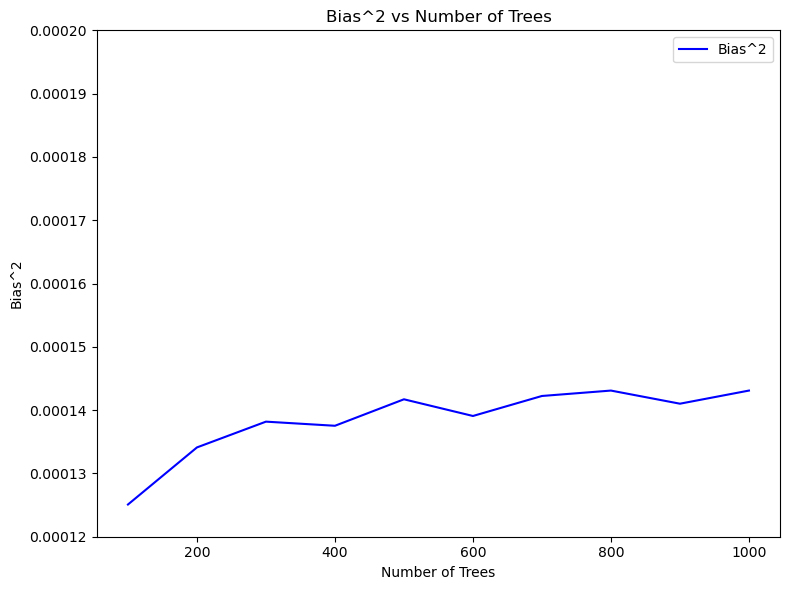

When the number of trees are approaching larger scale, as the number of trees increases,
the bias values would converge to a stable value.

variance - trees


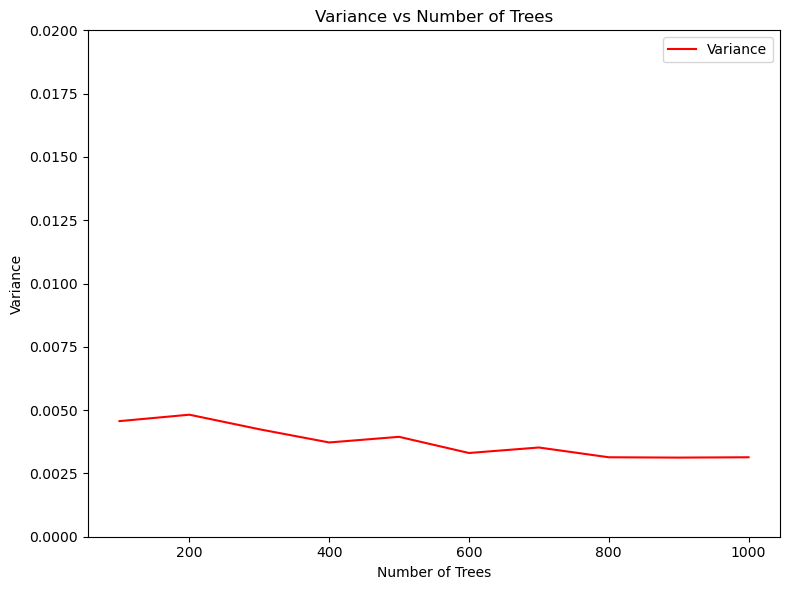

When the number of trees are approaching larger scale, as the number of trees increases,
would converge to a stable value.



In [14]:
print('Q2.1.6 Relationship of Bias/Variance with respect to Number of Trees in Random Forests:')
# 1. Bias^2 vs # of Trees
print("Bias^2 - Trees:")
plt.figure(figsize=(8, 6))
plt.ylim(0.00012, 0.00020)
plt.plot(num_trees, bias_squared, label="Bias^2", color='blue')
plt.xlabel("Number of Trees")
plt.ylabel("Bias^2")
plt.title("Bias^2 vs Number of Trees")
plt.legend()
plt.tight_layout()
plt.show()
print('When the number of trees are approaching larger scale, as the number of trees increases,\nthe bias values would converge to a stable value.\n')

# 2. Variance vs # of Trees 
print("variance - trees")
plt.figure(figsize=(8, 6))
plt.ylim(0, 0.0200)
plt.plot(num_trees, variance, label="Variance", color='red')
plt.xlabel("Number of Trees")
plt.ylabel("Variance")
plt.title("Variance vs Number of Trees")
plt.legend()
plt.tight_layout()
plt.show()
print("When the number of trees are approaching larger scale, as the number of trees increases,\nwould converge to a stable value.\n")